# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [3]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [7]:
# Importing the file porter_data_1.csv
df = pd.read_csv(r"C:\Users\HP\Desktop\ML\30688323-a1ea-4809-83c4-91d8096236c8-Delivery-Starter\Delivery_Starter\porter_data_1.csv")

In [9]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [11]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [21]:
df[['created_at', 'actual_delivery_time']].dtypes

created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [23]:
# Convert categorical features to category type
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [25]:
df[categorical_cols].dtypes

market_id                 category
store_primary_category    category
order_protocol            category
dtype: object

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [27]:
# Calculate time taken in minutes
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60


In [29]:
df[['created_at', 'actual_delivery_time', 'delivery_time_minutes']].head()

created_at actual_delivery_time  delivery_time_minutes
0 2015-02-06 22:24:17  2015-02-06 23:11:17                   47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25                   44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35                   55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46                   59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36                   46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [31]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour_of_day'] = df['created_at'].dt.hour
df['order_day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0).astype('category')


In [33]:
# Drop unnecessary columns
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

In [35]:
df.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  \
0                14.0                      21.0     34.44   
1                 2.0                       2.0     27.60   
2                 6.0                      18.0     11.56   
3                 6.0                       8.0     31.80   
4                 5.0                       7.0      8.20   

   delivery_time_minutes  order_hour_of_day  order_day_of_week isWeekend  
0                   47.0                 22                  4         0  
1                   44.0                 21                  1         0  
2                   55.0                  0                  0         0  
3                   59.0                  3                  3         0  
4                   46.0                  2                  1         0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [37]:
# Define target variable (y) and features (X)
y = df['delivery_time_minutes']

# Drop the target from the feature set
X = df.drop(columns=['delivery_time_minutes'])

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [43]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [45]:
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training features shape: (140621, 15)
Test features shape: (35156, 15)
Training target shape: (140621,)
Test target shape: (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [50]:
# Define numerical and categorical columns for easy EDA and data manipulation
# categorical columns
categorical_cols = X_train.select_dtypes(include=['category']).columns.tolist()

# numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [54]:
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']
Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

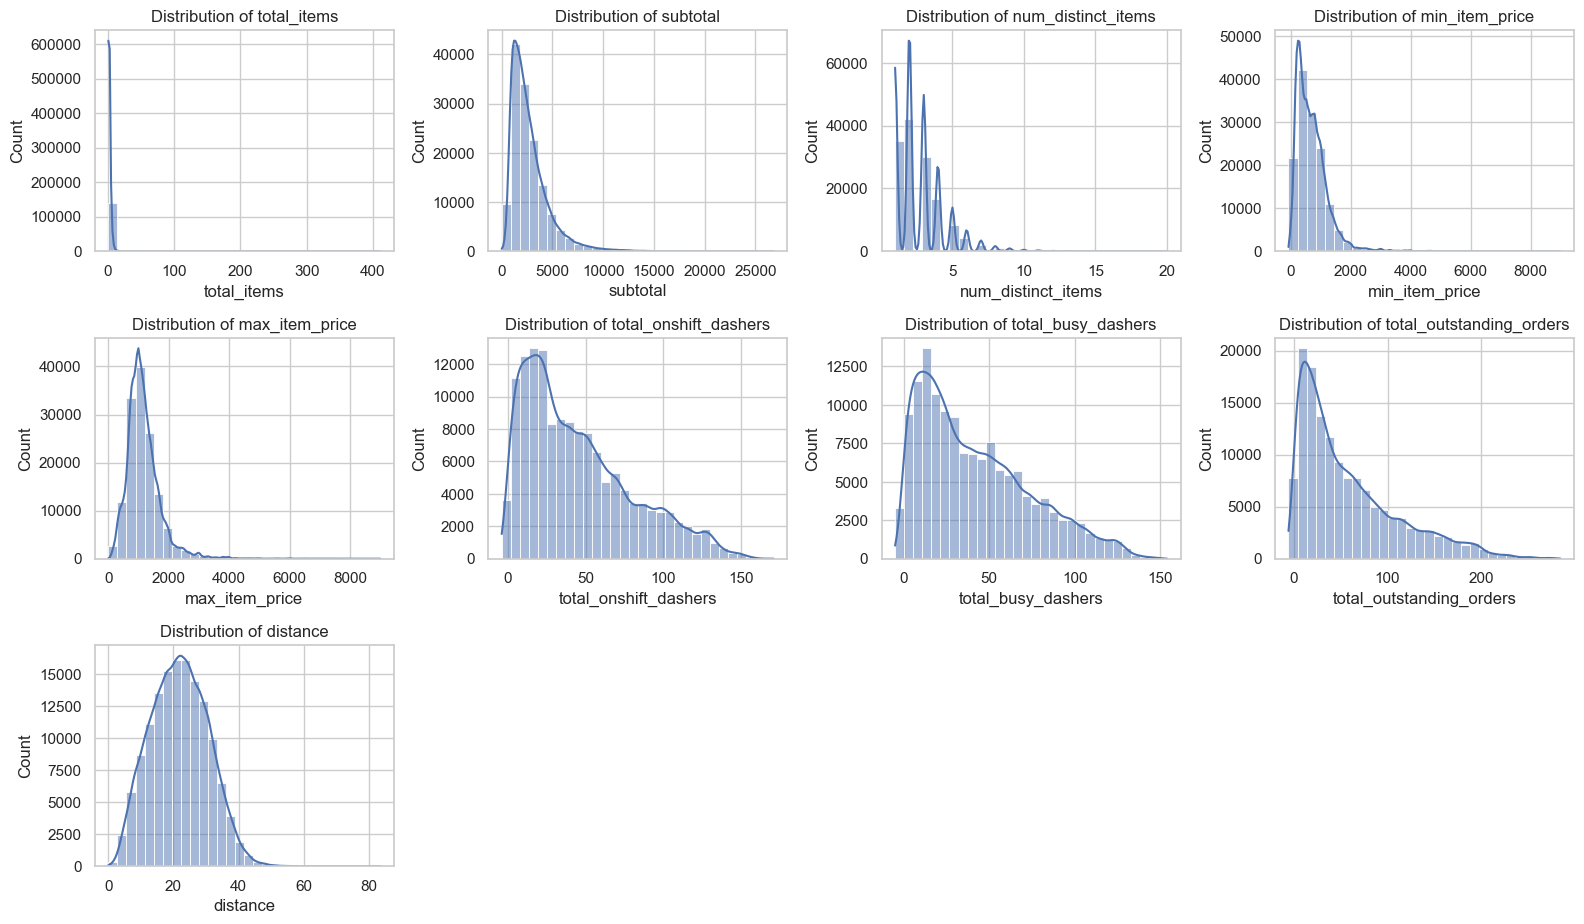

In [62]:
# Plot distributions for all numerical columns
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

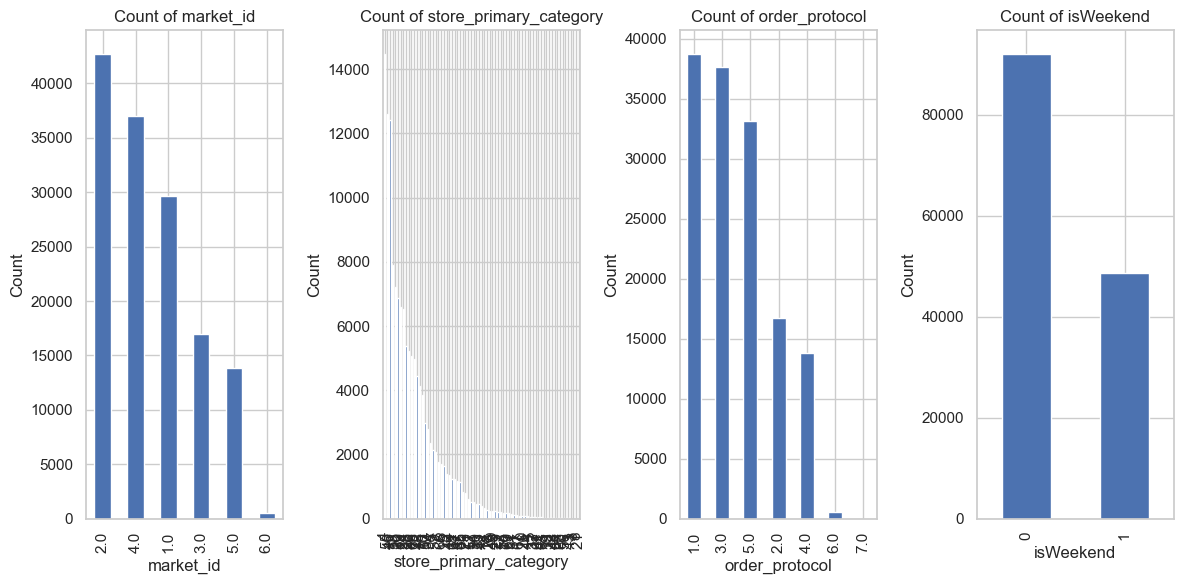

In [68]:
# Distribution of categorical columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i+1)
    X_train[col].value_counts().plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

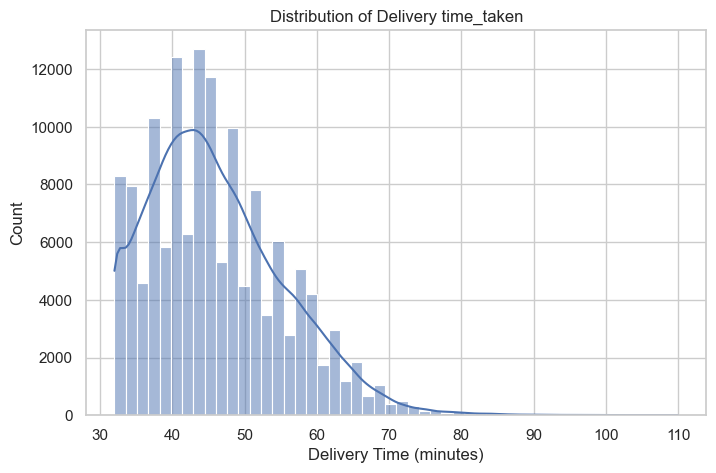

In [76]:
# Distribution of time_taken
plt.figure(figsize=(8, 5))
sns.histplot(y_train, kde=True, bins=50)
plt.title('Distribution of Delivery time_taken')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Count')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

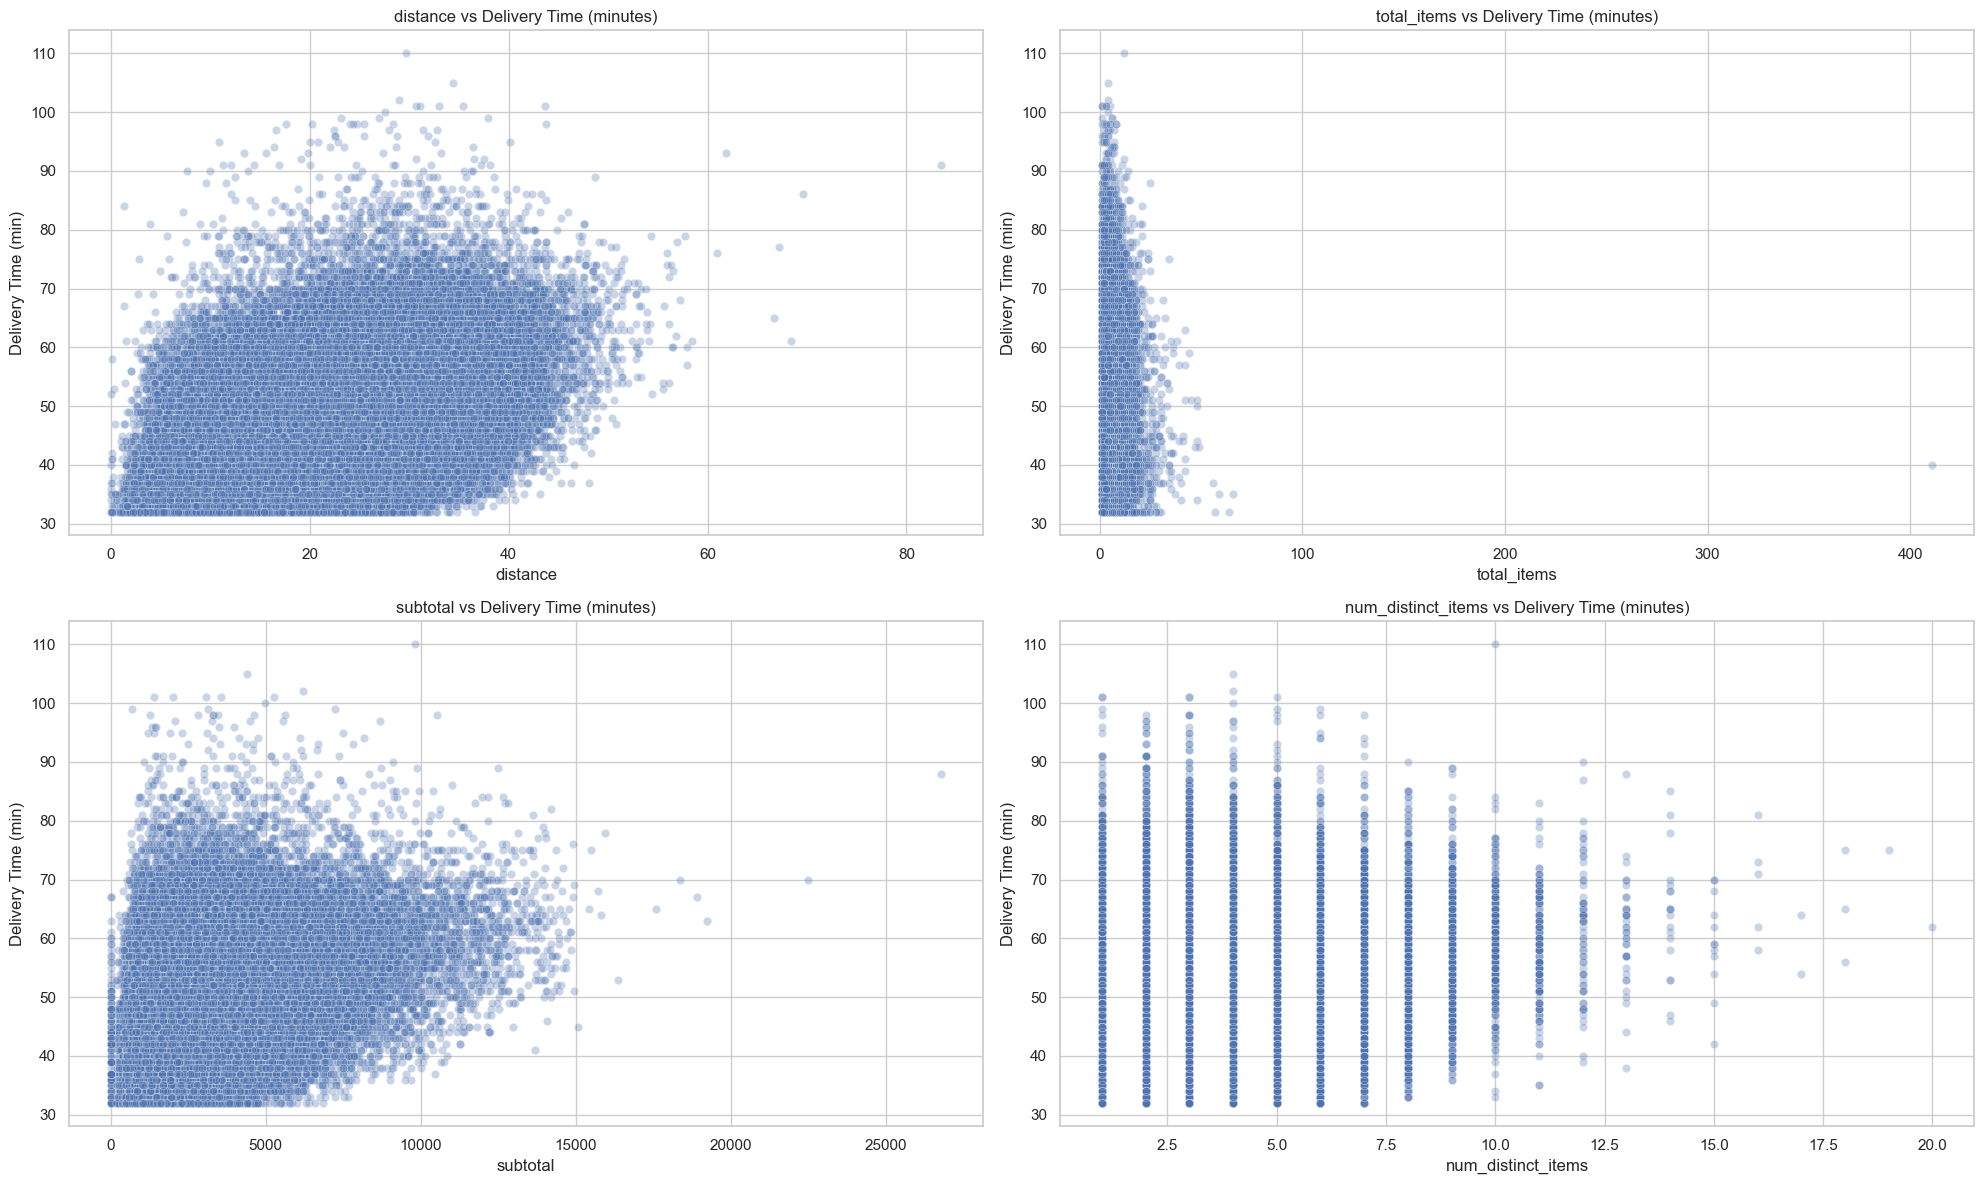

In [112]:
# Scatter plot to visualise the relationship between time_taken and other features
important_numerical_features = ['distance', 'total_items', 'subtotal', 'num_distinct_items']

plt.figure(figsize=(20, 12))
for i, col in enumerate(important_numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.3)
    plt.title(f'{col} vs Delivery Time (minutes)')
    plt.xlabel(col)
    plt.ylabel('Delivery Time (min)')
plt.tight_layout()
plt.show()

important_categorical_features = ['market_id', 'order_protocol', 'store_primary_category', 'isWeekend']

plt.figure(figsize=(20, 12))
for i, col in enumerate(important_categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.stripplot(x=X_train[col], y=y_train, alpha=0.2, jitter=0.3)
    plt.title(f'Strip Plot: {col} vs Delivery Time')
    plt.xlabel(col)
    plt.ylabel('Delivery Time (min)')
plt.tight_layout()
plt.show()

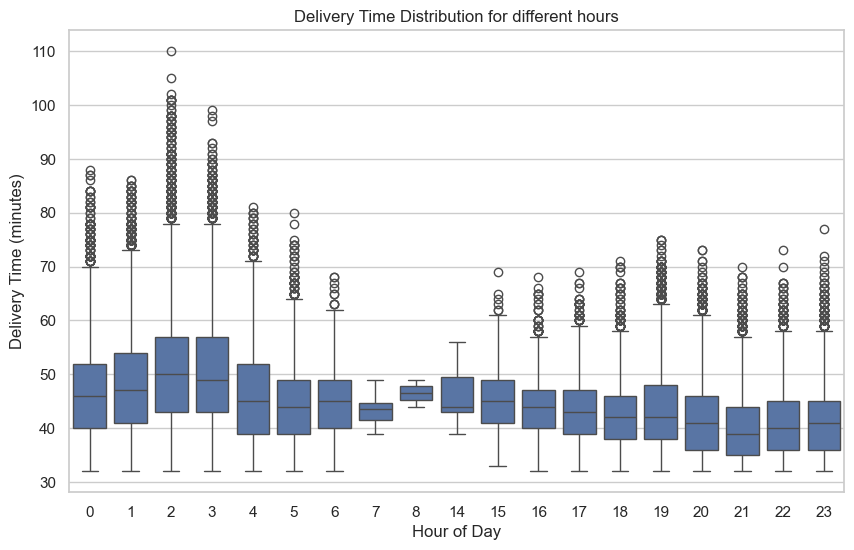

In [108]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['order_hour_of_day'], y=y_train)
plt.title('Delivery Time Distribution for different hours')
plt.xlabel('Hour of Day')
plt.ylabel('Delivery Time (minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [122]:
# Plot the heatmap of the correlation matrix
#Combine X_train with y_train for correlation
train_data = X_train.copy()
train_data['delivery_time_minutes'] = y_train

# Compute correlation matrix
corr_matrix = train_data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix (Including Target Variable)")
plt.show()
# Correlation of all features with delivery_time_minutes
target_corr = corr_matrix['delivery_time_minutes'].drop('delivery_time_minutes').sort_values()

print("Correlation with delivery_time_minutes:")
print(target_corr)

Correlation with delivery_time_minutes:
order_hour_of_day          -0.345716
min_item_price              0.021151
order_day_of_week           0.044897
total_onshift_dashers       0.171828
total_busy_dashers          0.206514
total_items                 0.220804
max_item_price              0.254650
num_distinct_items          0.312510
total_outstanding_orders    0.385028
subtotal                    0.413392
distance                    0.461026
Name: delivery_time_minutes, dtype: float64


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset
features_to_drop = ['min_item_price', 'order_day_of_week', 'total_onshift_dashers', 'total_busy_dashers']
X_train.drop(columns=features_to_drop, inplace=True)
X_test.drop(columns=features_to_drop, inplace=True)

In [168]:
print("Remaining features:", X_train.columns.tolist())

Remaining features: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance', 'order_hour_of_day', 'isWeekend']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [142]:
# Boxplot for time_taken
plt.figure(figsize=(10, 5))
sns.boxplot(y=y_train)
plt.title("Boxplot of Delivery Time (Minutes)")
plt.ylabel("Delivery Time (min)")
plt.show()

numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(20, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=X_train[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [144]:
# Handle outliers
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df


In [146]:
# For numerical columns 
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

X_train = cap_outliers_iqr(X_train, numerical_cols)
X_test = cap_outliers_iqr(X_test, numerical_cols)

In [148]:
#For targeted variable
y_train = cap_outliers_iqr(y_train.to_frame(), ['delivery_time_minutes'])['delivery_time_minutes']

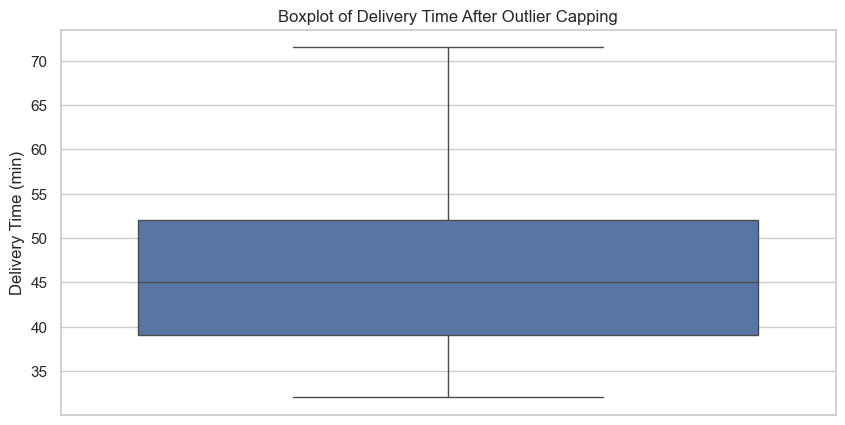

In [150]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=y_train)
plt.title("Boxplot of Delivery Time After Outlier Capping")
plt.ylabel("Delivery Time (min)")
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [164]:
# Define numerical and categorical columns for easy EDA and data manipulation
# Identify numerical and categorical columns
numerical_cols = X_test.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = ['market_id', 'order_protocol', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

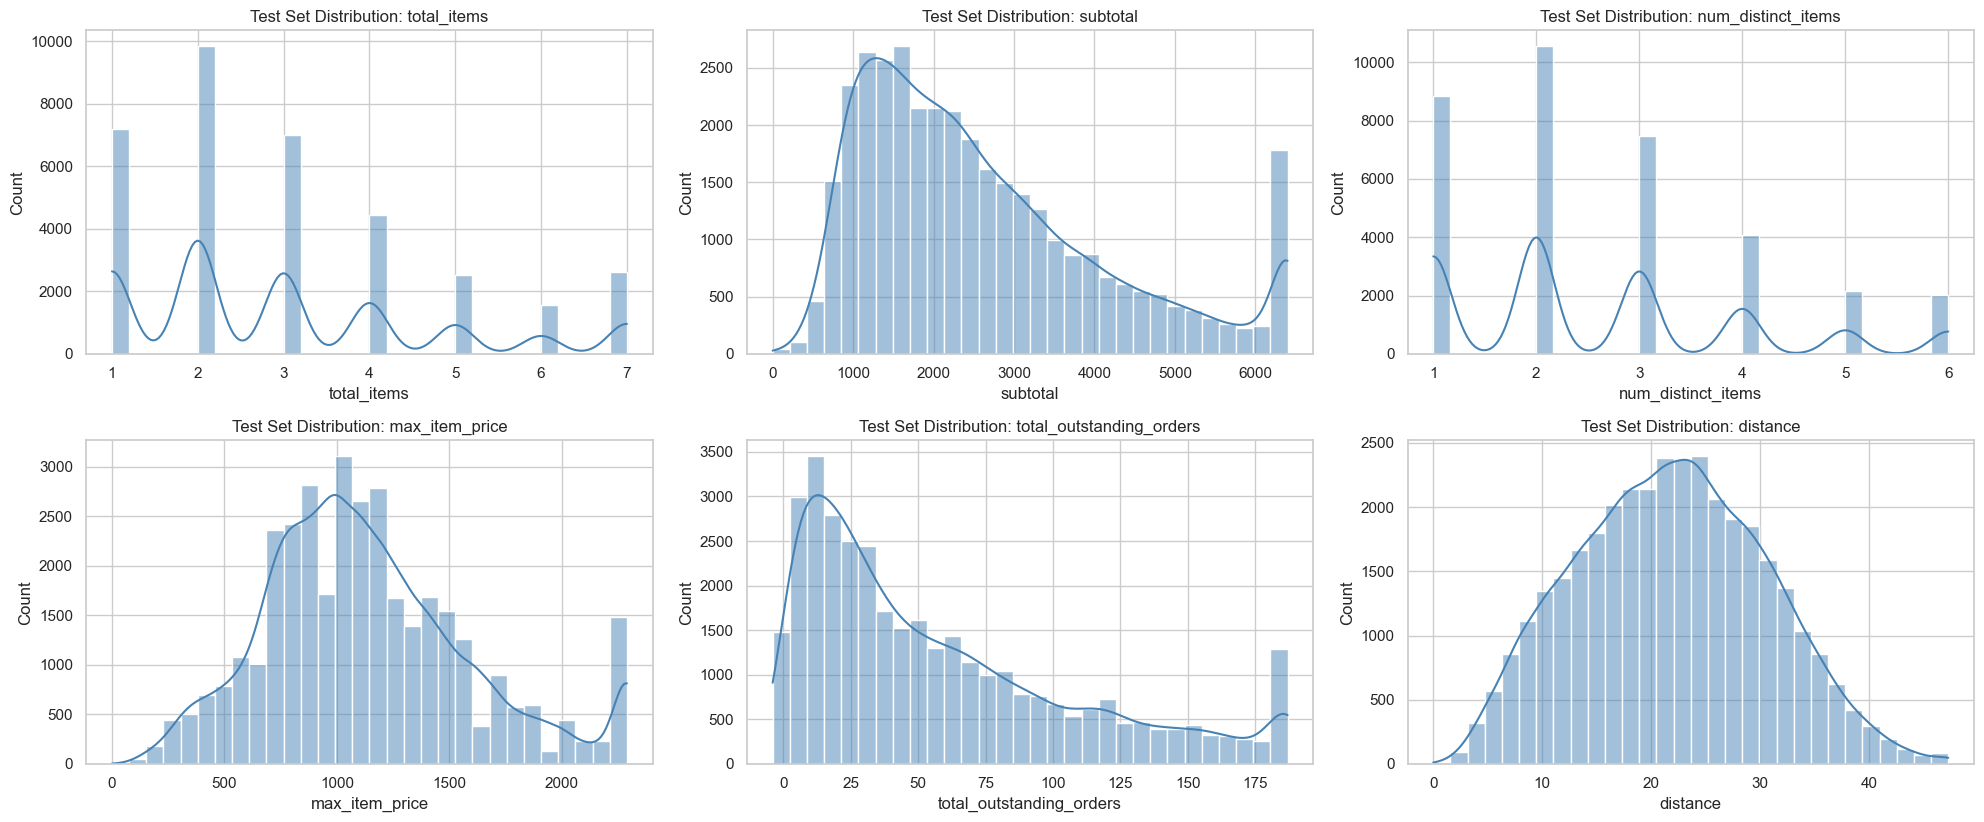

In [154]:
# Plot distributions for all numerical columns

plt.figure(figsize=(20, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(X_test[col], kde=True, bins=30, color='steelblue')
    plt.title(f"Test Set Distribution: {col}")
    plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

# Distribution of categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=X_test, x=col, hue=col, palette='Set2', legend=False)
    plt.title(f"Test Set Distribution: {col}")
    plt.tight_layout()
    plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

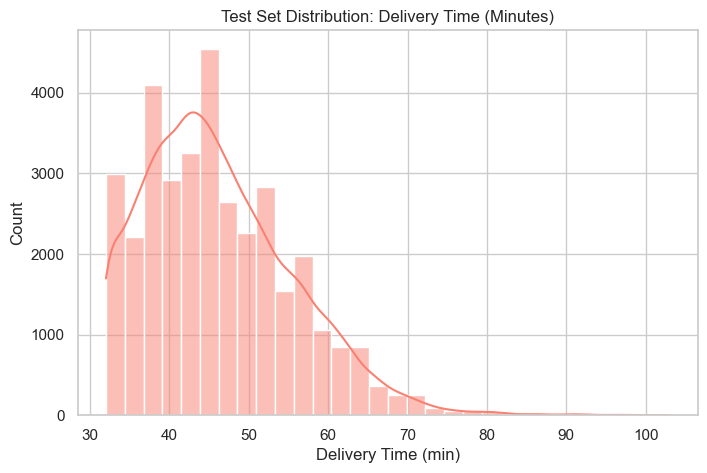

In [158]:
# Distribution of time_taken
plt.figure(figsize=(8, 5))
sns.histplot(y_test, kde=True, bins=30, color='salmon')
plt.title("Test Set Distribution: Delivery Time (Minutes)")
plt.xlabel("Delivery Time (minutes)")
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [170]:
# Drop the weakly correlated columns from training dataset
print("Remaining features:", X_train.columns.tolist())

Remaining features: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance', 'order_hour_of_day', 'isWeekend']


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [176]:
# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [174]:
# Apply scaling to the numerical columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [178]:
# Create/Initialise the model
lr_model = LinearRegression()

In [180]:
# Train the model using the training data
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [182]:
# Make predictions
y_pred = lr_model.predict(X_test_scaled)

In [184]:
# Find results for evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [188]:
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 6.43
MAE: 4.95
R² Score: 0.5282


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [204]:
# Loop through the number of features and test the model
# Prepare
estimator = LinearRegression()
max_features = X_train_scaled.shape[1]

r2_scores = []
rmse_scores = []
feature_counts = list(range(1, max_features + 1))

# Loop over number of features
for n in feature_counts:
    selector = RFE(estimator, n_features_to_select=n)
    selector.fit(X_train_scaled, y_train)
    
    X_train_sel = X_train_scaled.loc[:, selector.support_]
    X_test_sel = X_test_scaled.loc[:, selector.support_]
    
    estimator.fit(X_train_sel, y_train)
    y_pred = estimator.predict(X_test_sel)
    
    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Plotting R² and RMSE against number of features
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(feature_counts, r2_scores, marker='o')
plt.title("R² Score vs Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("R² Score")

plt.subplot(1,2,2)
plt.plot(feature_counts, rmse_scores, marker='o', color='red')
plt.title("RMSE vs Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("RMSE")

plt.tight_layout()
plt.show()

In [206]:
# Build the final model with selected number of features

final_estimator = LinearRegression()
rfe_final = RFE(final_estimator, n_features_to_select=8)
rfe_final.fit(X_train_scaled, y_train)

# Selected features
selected_features = X_train_scaled.columns[rfe_final.support_]
print("Top 8 Selected Features:", selected_features.tolist())

# Train model
X_train_final = X_train_scaled[selected_features]
X_test_final = X_test_scaled[selected_features]

final_estimator.fit(X_train_final, y_train)
y_pred = final_estimator.predict(X_test_final)

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nFinal Model Evaluation (8 Features):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.4f}")


Top 8 Selected Features: ['market_id', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'total_outstanding_orders', 'distance', 'isWeekend']

Final Model Evaluation (8 Features):
RMSE: 6.59
MAE : 5.11
R²  : 0.5041


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

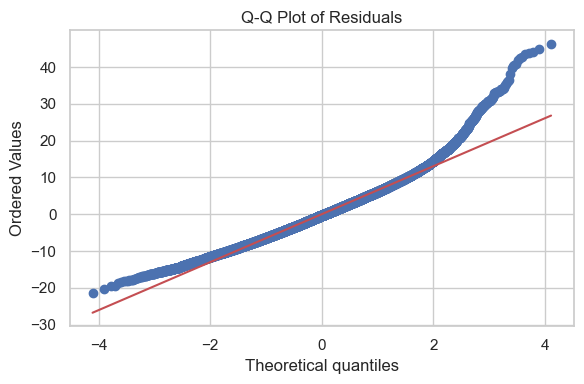

In [208]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred

# Residuals vs Predicted Values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.tight_layout()
plt.show()

# Q-Q Plot (Quantile-Quantile Plot)
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

# Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30, color="skyblue")
plt.axvline(0, color='red', linestyle='--')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [210]:
# Compare the scaled vs unscaled features used in the final model
# Get the coefficients and feature names
scaled_coeffs = pd.Series(model.coef_, index=X_train_scaled.columns)
scaled_coeffs = scaled_coeffs.sort_values(ascending=False)
print("Scaled Coefficients:\n", scaled_coeffs)

# Train unscaled model using raw (unscaled) data
unscaled_model = LinearRegression()
unscaled_model.fit(X_train[scaled_coeffs.index], y_train)

# Get unscaled coefficients
unscaled_coeffs = pd.Series(unscaled_model.coef_, index=scaled_coeffs.index)
unscaled_coeffs = unscaled_coeffs.sort_values(ascending=False)
print("Unscaled Coefficients:\n", unscaled_coeffs)

# Combine into one DataFrame
comparison_df = pd.DataFrame({
    "Scaled Coeff": scaled_coeffs,
    "Unscaled Coeff": unscaled_coeffs
})

# Plot
comparison_df.sort_values("Scaled Coeff").plot(kind='barh', figsize=(8, 6), title="Coefficient Comparison")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


Scaled Coefficients:
 distance                    3.981302
total_outstanding_orders    2.463966
subtotal                    2.319366
isWeekend                   1.724372
total_items                 0.326528
num_distinct_items          0.325337
max_item_price              0.102730
store_primary_category      0.002444
order_hour_of_day          -0.179585
market_id                  -0.705204
order_protocol             -0.938862
dtype: float64
Unscaled Coefficients:
 isWeekend                   1.724372
distance                    0.455987
num_distinct_items          0.271868
total_items                 0.185988
total_outstanding_orders    0.048491
store_primary_category      0.002444
subtotal                    0.001513
max_item_price              0.000221
order_hour_of_day          -0.179585
market_id                  -0.705204
order_protocol             -0.938862
dtype: float64


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [214]:
# Analyze the effect of a unit change in a feature, say 'total_items'
feature_name = 'total_items'

# Scaled
scaled_coeff = model.coef_[list(X_train_scaled.columns).index(feature_name)]
feature_std = X_train[feature_name].std()
target_std = y_train.std()

unit_effect_scaled = (scaled_coeff * target_std) / feature_std

# Unscaled
# Fit model without scaling
unscaled_model = LinearRegression()
unscaled_model.fit(X_train[X_train_scaled.columns], y_train)
unscaled_coeff = unscaled_model.coef_[list(X_train.columns).index(feature_name)]

print(f"Using Scaled Coefficient:")
print(f"A 1-unit increase in '{feature_name}' increases delivery time by approx {unit_effect_scaled:.2f} minutes.")

print("\nUsing Unscaled Coefficient:")
print(f"A 1-unit increase in '{feature_name}' increases delivery time by approx {unscaled_coeff:.2f} minutes.")



Using Scaled Coefficient:
A 1-unit increase in 'total_items' increases delivery time by approx 1.70 minutes.

Using Unscaled Coefficient:
A 1-unit increase in 'total_items' increases delivery time by approx 0.19 minutes.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
Yes, there are categorical variables such as:
- market_id
- order_protocol
- store_primary_category
- isWeekend
- order_day_of_week
- order_hour_of_day
I could infer that:
- isWeekend orders tend to have slightly higher delivery times.
- order_protocol shows varied delivery times across categories.
- market_id might indicate geographical differences affecting delivery times



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
It means 20% of the data is used for testing the model and 80% is used for training.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
Distance with a correlation of 0.461026



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
To detect the outliner I used boxplots and IQR method. To address them I used winsorization to cap extreme values at the 1st and 99th percentiles.




---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
The top 3 features significantly affecting the delivery time are
1. distance
2. subtotal
3. total_items




---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
Linear regression interprets the linear relationship between dependent and independent variables. It attempts to establish a straight-line relationship between the input variables and the output.
The algorithm tries to find the best-fitting straight line through the data points in such a way that the distance between the actual points and the predicted values is minimized.
It is generally given by y=mx+c
where y is targeted value 
m= Intercept
x= Input features
c= constant



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
- Simple Linear Regression: One independent variable.
- Multiple Linear Regression: Two or more independent variables.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
The cost function in linear regression is Mean Squared Error (MSE) which measures the average squared difference between actual and predicted values. It is minimized using gradient descent or analytical methods.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
- Overfitting model is too complex and almost covers all the data points, captures all the noise and random fluctuation. It performs well on training but poorly on test data.
- Underfitting model is too simple and fails to capture patterns in the training data.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
Residual plots help in deiagnosing a linear regression model by detecting
- Non-linearity
- Heteroscedasticity
- Outliers
- Non-normality of residuals
A good model has residuals randomly scattered around zero.
